In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

columnsHistoricalbars = ['close','high','low','trade','open','time','volume','volumeWeighted']

stock_data = pd.read_json('../data/AAPL.csv', convert_dates=['Time'])
stock_data = pd.json_normalize(stock_data['bars']['AAPL'])

stock_data.columns = columnsHistoricalbars
stock_data.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_289388\1246295545.py:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  stock_data = pd.read_json('../data/AAPL.csv', convert_dates=['Time'])


ValueError: Expected object or value

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['close'].values.reshape(-1,1))

In [ ]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
24/24 [==============================] - 8s 101ms/step - loss: 0.0148
Epoch 2/10
24/24 [==============================] - 2s 97ms/step - loss: 0.0034
Epoch 3/10
24/24 [==============================] - 2s 96ms/step - loss: 0.0031
Epoch 4/10
24/24 [==============================] - 3s 108ms/step - loss: 0.0024
Epoch 5/10
24/24 [==============================] - 3s 119ms/step - loss: 0.0021
Epoch 6/10
24/24 [==============================] - 3s 120ms/step - loss: 0.0020
Epoch 7/10
24/24 [==============================] - 3s 116ms/step - loss: 0.0018
Epoch 8/10
24/24 [==============================] - 3s 122ms/step - loss: 0.0016
Epoch 9/10
24/24 [==============================] - 3s 120ms/step - loss: 0.0014
Epoch 10/10
24/24 [==============================] - 3s 120ms/step - loss: 0.0016


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

12/12 [==============================] - 2s 45ms/step - loss: 6.4635e-04
Test Loss: 0.0006463502068072557


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 34ms/step


In [ ]:
original_data = stock_data['close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

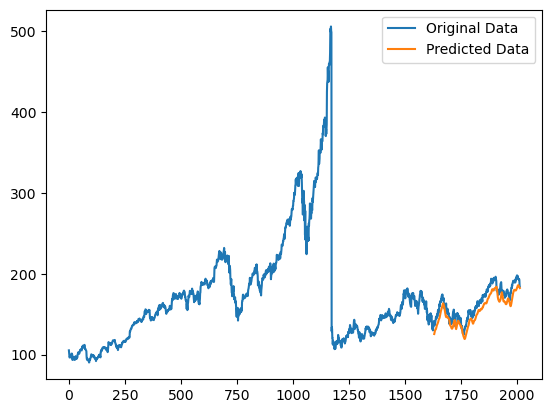

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 [==============================] - 0s 31ms/step


array([166.51222229, 167.01522827, 167.57565308, 168.29719543,
       169.53022766, 171.33773804, 173.23475647, 175.13627625,
       176.80429077, 177.18884277, 176.103302  , 174.44256592,
       172.82629395, 171.02011108, 169.07588196, 167.52787781,
       166.30413818, 165.82901001, 165.97724915, 165.980896  ,
       165.72317505, 165.48730469, 165.47167969, 165.03100586,
       164.23042297, 163.38067627, 162.68603516, 162.50630188,
       162.44869995, 162.64215088, 163.11404419, 164.01927185,
       165.23742676, 166.38334656, 167.52714539, 168.63140869,
       169.30914307, 169.64292908, 169.5231781 , 168.98957825,
       168.24336243, 167.12750244, 165.97674561, 165.01507568,
       163.97192383, 162.47393799, 161.1217041 , 160.30474854,
       159.95515442, 160.34228516, 161.5632782 , 162.96116638,
       164.62823486, 166.56637573, 168.53395081, 170.18678284,
       171.97663879, 173.36450195, 174.6942749 , 175.86708069,
       177.00897217, 177.95681763, 178.89508057, 179.57

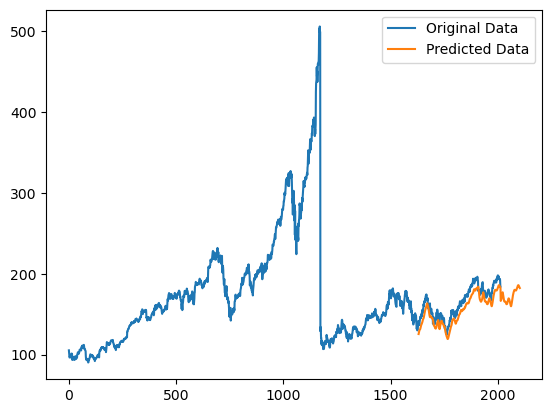

In [ ]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #, root_mean_squared_error

# Assuming y_test are the actual values and y_pred are the predicted values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
#rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}") # better close to 0
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


MSE: 24257.497782473085
RMSE: 155.75325392127937
MAE: 154.72897065221926
R2: -11823269.245628819
